In [31]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

sys.path.append("../mio/features")
sys.path.append("../mio/utilities/")
sys.path.append("../mio/utilities/summarystats")
sys.path.append("../mio/data")
sys.path.append("../mio/designs")
from mio.visualize import interactive_scatter
from mio.data.dataset import DataSet
from gillespy2.solvers.cpp import SSACSolver
from gillespy2.solvers.stochkit import StochKitSolver
import gillespy2
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
model_doc = gillespy2.StochMLDocument.from_file("/home/wrede/windows_projects/psa/psa/examples/vilar_oscillator.xml")

In [8]:
model = model_doc.to_model("Vilar")

In [34]:
def set_model_parameters(model, params):
    """ params - array, needs to have the same order as model.listOfParameters """
    for e, (pname, p) in enumerate(model.listOfParameters.items()):
        model.get_parameter(pname).set_expression(params[e])
    return model


def simulator(param):
    
    model = set_model_parameters(model, param)
    num_timepoints = 400
    model.tspan = np.linspace(0, 400, num_timepoints)
    num_trajectories = 10
    res = model.run(solver=StochKitSolver, show_labels=False, number_of_trajectories=num_trajectories)
    
    return np.array(res)
    
    

In [29]:
import sys
sys.path.append("../mio/features")
sys.path.append("../mio/utilities/")
sys.path.append("../mio/utilities/summarystats")
from summary_base import SummaryBase
from feature_extraction import generate_tsfresh_features
from tsfresh.feature_extraction import MinimalFCParameters


# Class definition: SummariesEnsemble
class SummariesTSFRESH(SummaryBase):
    """
    An ensemble of different statistics from TSFRESH
    """

    def __init__(self):
        self.name = 'SummariesTSFRESH'
        self.features = None
        super(SummariesTSFRESH, self).__init__(self.name)

    def compute(self, data, features=MinimalFCParameters()):
        self.features = features
        feature_values = generate_tsfresh_features(data, features)
        # ToDo: Check for NaNs
        return feature_values


In [239]:
num_timepoints = 400
model.tspan = np.linspace(0, 400, num_timepoints)
num_trajectories = 200
res = model.run(solver=StochKitSolver, show_labels=False, number_of_trajectories=num_trajectories)
res = np.array(res)


In [240]:
f = SummariesTSFRESH()
data = DataSet(name='tsfresh')

data.configurations['listOfParameters'] = list(model.listOfParameters.keys())
data.configurations['listOfSpecies'] = list(model.listOfSpecies.keys())
data.configurations['listOfSummaries'] = MinimalFCParameters()

In [241]:
params = [[float(x.expression) for x in list(model.get_all_parameters().values())]]*len(res)
params = np.array(params)
labels = np.ones(len(res))*-1
features = f.compute(res)

data.set_data(inputs=params, targets=labels, time_series=res, summary_stats=features) 

In [242]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(data.s)

<IPython.core.display.Javascript object>


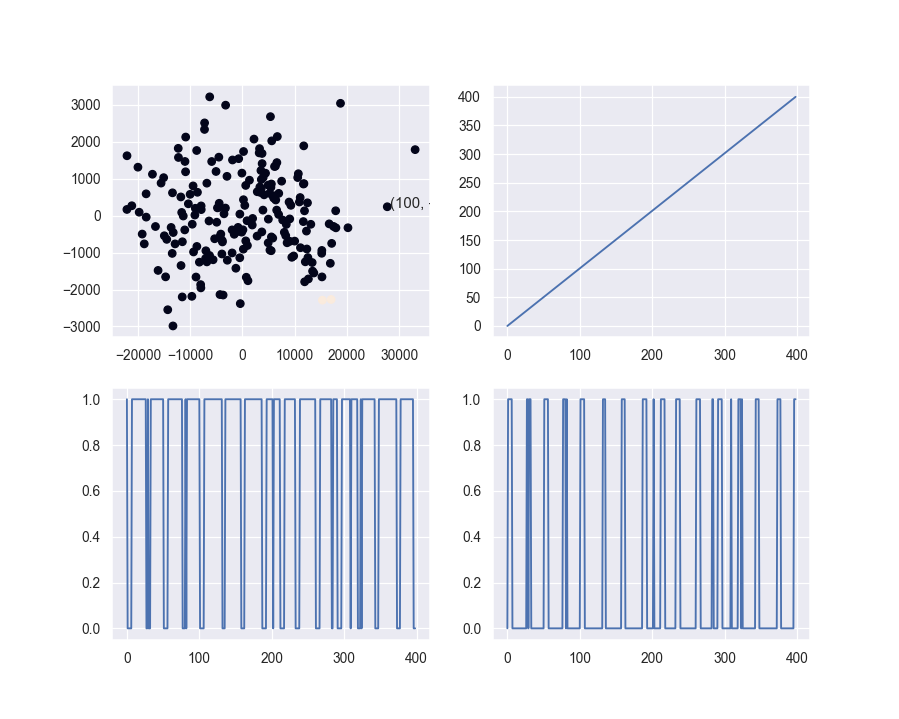

Button(description='Clear all', style=ButtonStyle())

Button(description='Submit', style=ButtonStyle())

IntSlider(value=0, max=10, min=-1)

Dropdown(description='Species plot 1:', options={'Da': 0, 'R': 8, 'A': 7, 'Da_prime': 1, 'Dr': 3, 'C': 6, 'Mr'…

Dropdown(description='Species plot 2:', index=3, options={'Da': 0, 'R': 8, 'A': 7, 'Da_prime': 1, 'Dr': 3, 'C'…

Dropdown(description='Species plot 3:', index=7, options={'Da': 0, 'R': 8, 'A': 7, 'Da_prime': 1, 'Dr': 3, 'C'…

,alpha_A,alpha_a_prime,alpha_r,alpha_r_prime,beta_a,beta_r,delta_ma,delta_mr,delta_a,delta_r,gamma_a,gamma_r,gamma_c,Theta_a,Theta_r
0,50.0,500.0,0.01,50.0,50.0,5.0,10.0,0.5,1.0,0.2,1.0,1.0,2.0,50.0,100.0
1,50.0,500.0,0.01,50.0,50.0,5.0,10.0,0.5,1.0,0.2,1.0,1.0,2.0,50.0,100.0
2,50.0,500.0,0.01,50.0,50.0,5.0,10.0,0.5,1.0,0.2,1.0,1.0,2.0,50.0,100.0
3,50.0,500.0,0.01,50.0,50.0,5.0,10.0,0.5,1.0,0.2,1.0,1.0,2.0,50.0,100.0
4,50.0,500.0,0.01,50.0,50.0,5.0,10.0,0.5,1.0,0.2,1.0,1.0,2.0,50.0,100.0
5,50.0,500.0,0.01,50.0,50.0,5.0,10.0,0.5,1.0,0.2,1.0,1.0,2.0,50.0,100.0
6,50.0,500.0,0.01,50.0,50.0,5.0,10.0,0.5,1.0,0.2,1.0,1.0,2.0,50.0,100.0
7,50.0,500.0,0.01,50.0,50.0,5.0,10.0,0.5,1.0,0.2,1.0,1.0,2.0,50.0,100.0
8,50.0,500.0,0.01,50.0,50.0,5.0,10.0,0.5,1.0,0.2,1.0,1.0,2.0,50.0,100.0
9,50.0,500.0,0.01,50.0,50.0,5.0,10.0,0.5,1.0,0.2,1.0,1.0,2.0,50.0,100.0


In [247]:
interactive_scatter.interative_scatter(scatter_data=pca_data, data_class=data)